In [1]:
import pandas as pd

In [244]:
df=pd.read_csv('train_data.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
#no null values
#apt data type for all columns

In [ ]:
#chech uniqueness for every column to find continuous or category
unique_values = df['sc_w'].unique()
sorted_unique_values = sorted(unique_values)
print(sorted_unique_values)

In [63]:
duplicates=df.duplicated()

In [64]:
duplicates.sum()

0

In [ ]:
#no duplicates found
#finally this data looks good and doesnt need data cleaning

In [106]:
#seperating quantitative into seperate table
columns_to_drop = ['blue','dual_sim', 'four_g',
                   'talk_time', 'three_g',
                   'touch_screen', 'wifi', 'price_range']
df_quantitative = df.drop(columns=columns_to_drop, axis=1)
df_quantitative

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10


In [ ]:
#seperating continuous and categorical column
#continuous = battery_power,clock_speed, m_dep, mobile_wt, px_height, px_width, ram, sc_h, sc_w, =Total - 9

#categorical = blue, dual_sim, fc, four_g, int_memory, n_cores, pc,  talk_time, three_g, touch_screen, wifi, price_range
                Total - 12

In [98]:
#seperating continuous and categorical columns into seperate table
columns_to_drop = ['blue','dual_sim', 'fc', 'four_g',
                   'int_memory', 'n_cores', 'pc', 'talk_time', 'three_g',
                   'touch_screen', 'wifi', 'price_range']
df_continuous = df.drop(columns=columns_to_drop, axis=1)
df_continuous

,battery_power,clock_speed,m_dep,mobile_wt,px_height,px_width,ram,sc_h,sc_w
0,842,2.2,0.6,188,20,756,2549,9,7
1,1021,0.5,0.7,136,905,1988,2631,17,3
2,563,0.5,0.9,145,1263,1716,2603,11,2
3,615,2.5,0.8,131,1216,1786,2769,16,8
4,1821,1.2,0.6,141,1208,1212,1411,8,2
...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0.8,106,1222,1890,668,13,4
1996,1965,2.6,0.2,187,915,1965,2032,11,10
1997,1911,0.9,0.7,108,868,1632,3057,9,1
1998,1512,0.9,0.1,145,336,670,869,18,10


In [4]:

columns_to_drop = ['battery_power',	'clock_speed', 'm_dep', 'px_height',
                   'mobile_wt', 'px_width', 'ram', 'sc_h', 'sc_w']
df_category = df.drop(columns=columns_to_drop, axis=1)
df_category

,blue,dual_sim,fc,four_g,int_memory,n_cores,pc,talk_time,three_g,touch_screen,wifi,price_range
0,0,0,1,0,7,2,2,19,0,0,1,1
1,1,1,0,1,53,3,6,7,1,1,0,2
2,1,1,2,1,41,5,6,9,1,1,0,2
3,1,0,0,0,10,6,9,11,1,0,0,2
4,1,0,13,1,44,2,14,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,1,0,1,2,6,14,19,1,1,0,0
1996,1,1,0,0,39,4,3,16,1,1,1,2
1997,0,1,1,1,36,8,3,5,1,1,0,3
1998,0,0,4,1,46,5,5,19,1,1,1,0


In [ ]:
#checking distribution for Quantitative Variables by histogram

 -battery_power, clock_speed, int_memory, m_dep, mobile_wt,n_cores, pc, px_width, ram, sc_h, talk_time is okay distributed normally
 -but fc, px_height, sc_w is skewed towards right so need to check with maths

skewness = -1 to 1 is normal
kurtosis = -2 to 2 is normal

-fc(Skewness: 1.0190463925723268, Kurtosis: 0.27338561771466496), 
-px_height(Skewness: 0.6657714484857727, Kurtosis: -0.3180748831869664), 
-sc_w(Skewness: 0.6333116340766181, Kurtosis: -0.39154816455030694)

from this fc alone not dtributed well and seen more skewness towards right

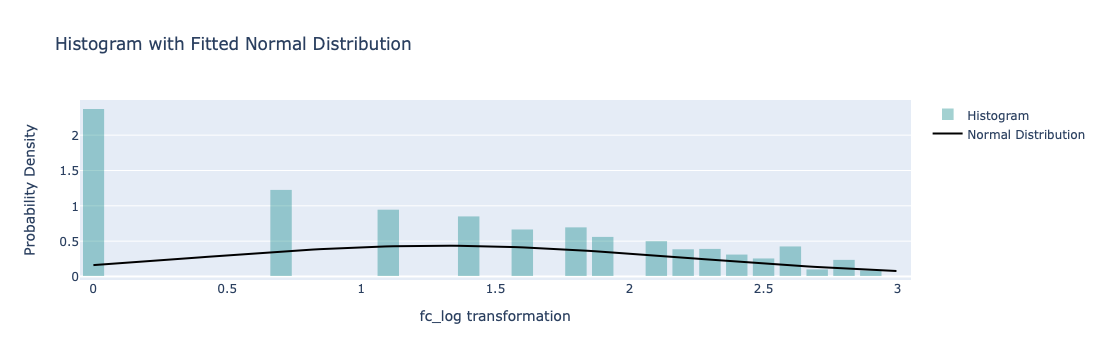

In [139]:
import numpy as np
import plotly.graph_objs as go
from scipy.stats import norm

# Generate some random data
data = df['fc_log']

# Fit a normal distribution to the data
mu, sigma = norm.fit(data)

# Create a histogram trace
hist_trace = go.Histogram(
    x=data,
    histnorm='probability density',
    opacity=0.6,
    marker_color='rgba(0, 128, 128, 0.6)',
    name='Histogram'
)

# Create a normal distribution curve trace
x_range = np.linspace(min(data), max(data), 100)
pdf_values = norm.pdf(x_range, mu, sigma)
normal_trace = go.Scatter(
    x=x_range,
    y=pdf_values,
    mode='lines',
    line=dict(color='black', width=2),
    name='Normal Distribution'
)

# Create layout
layout = go.Layout(
    title='Histogram with Fitted Normal Distribution',
    xaxis=dict(title='fc_log transformation'),
    yaxis=dict(title='Probability Density'),
    bargap=0.2
)

# Create figure
fig = go.Figure(data=[hist_trace, normal_trace], layout=layout)

# Show plot
fig.show()


In [ ]:
# Assuming 'data' is your numerical data
import numpy as np
from scipy import stats
data=df['three_g']
mean = np.mean(data)
median = np.median(data)
mode = stats.mode(data)
std_dev = np.std(data)
skewness = stats.skew(data)
kurtosis = stats.kurtosis(data)

print(data)
print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)
print("Standard Deviation:", std_dev)
print("Skewness:", skewness)
print("Kurtosis:", kurtosis)


In [ ]:
#checking distribution for Qualitative Variables by violin plot

blue, dual_sim, touch_screen, four_g, wifi is distributed well

three_g is not distributed well seen nearly 75% value in 3g

so removing three_g column 

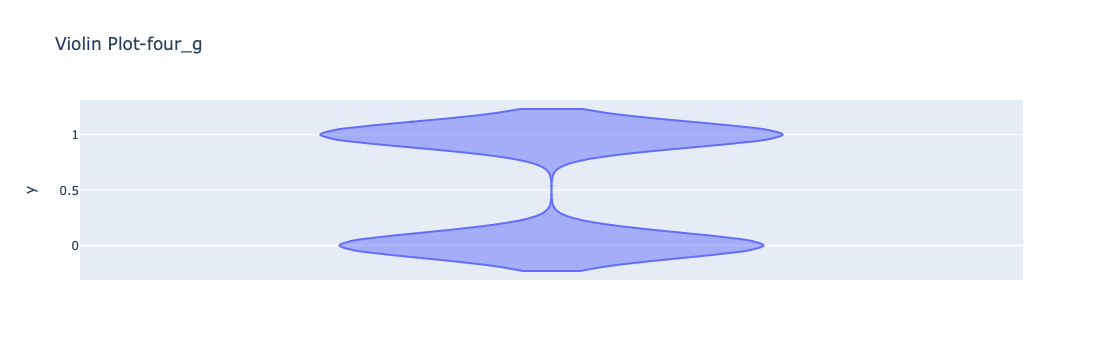

In [208]:
import plotly.express as px

# Assuming 'data' is your categorical variable
data = df['four_g']

# Create violin plot
fig = px.violin(y=data, title='Violin Plot-four_g')

# Show plot
fig.show()


In [ ]:
#checking for outliers by boxplot
fc , px_height having outlier
but i didnt removed outliers because it will help to find some insights in rare situations


In [ ]:
import pandas as pd
import plotly.express as px

# Assuming your data is loaded into a DataFrame called df
# Replace 'df' with the name of your DataFrame if it's different
# Replace 'x' with the name of your column
fig = px.box(df, y='fc', title='Box Plot - clock_speed')

# Update layout for better visualization
fig.update_layout(
    yaxis=dict(title='x'),               # Y-axis label
    font=dict(size=12),                  # Font size
    margin=dict(l=50, r=50, t=50, b=50)  # Adjust margins
)

# Show plot
fig.show()


In [ ]:
#relationship between Quantitative variable and Target Variable by boxplot

battery_power - price_range-3 has high battery power and its starting range itself at high
clock_speed- almost same,75% of price_range 0 has slightly higher clockspeed than others
m_dep - 75% of price_range- 1 and 3 has slightly higher than others

mobile_wt - price_range- 3 has lesser weight
px_height - price_range- 3 has higher pixel height
            price_range- 0 has worst pixel height

px_width - price_range- 3 has higher pixel width
             price_range- 0 has worst pixel width

ram - price_range- 3 has significally very high ram compare to all
    price_range- 0 as significally very low ram compare to all

sc_h - almost all are equal but price_range- 3 has slightly higher startin range

sc_w -  price_range- 3 has higher screen width

fc- price_range- 0 has lowest

int_memory - all price range has somewhat equal internal memory no significant change
n_cores- price_range- 1 has lowest

pc -  75% of price_range- 3 has slightly higher than others


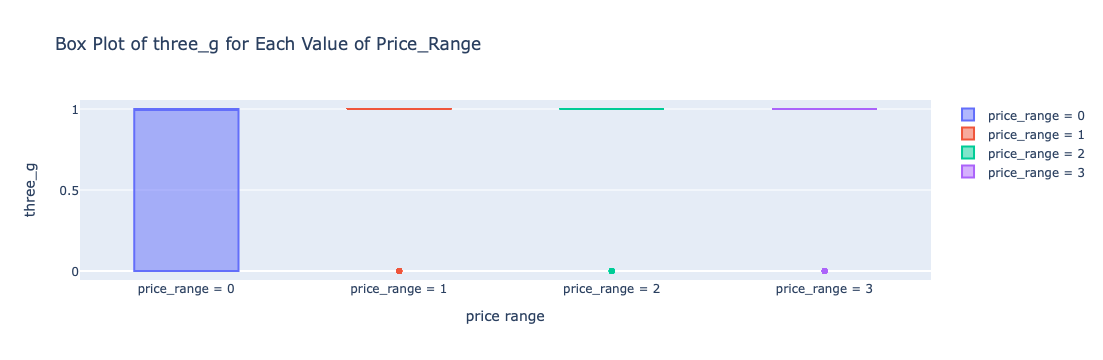

In [210]:
import plotly.graph_objects as go

# Assuming df is your DataFrame with independent and dependent variables

# Define your independent variable and dependent variable
independent_variable = 'three_g'
dependent_variable = 'price_range'

# Group the data by the dependent variable and get unique values
grouped_data = df.groupby(dependent_variable)[independent_variable]

# Create an empty list to store box plot traces
box_traces = []

# Iterate over each group and create a box plot trace
for group_name, group_data in grouped_data:
    box_trace = go.Box(y=group_data, name=f'price_range = {group_name}')
    box_traces.append(box_trace)

# Create layout
layout = go.Layout(title='Box Plot of three_g for Each Value of Price_Range',
                   xaxis=dict(title='price range'),
                   yaxis=dict(title='three_g'))

# Create figure
fig = go.Figure(data=box_traces, layout=layout)

# Show the plot
fig.show()


In [216]:
# Filter rows where 'price_range' is 0
df_price_range_0 = df[df['price_range'] == 3]

# Count the occurrences of each value in 'three_g' for 'price_range' = 0
three_g_counts = df_price_range_0['three_g'].value_counts()

print("Counts for 'three_g' when 'price_range' is 0:")
print(three_g_counts)

Counts for 'three_g' when 'price_range' is 0:
three_g
1    385
0    115
Name: count, dtype: int64


In [211]:
df

,battery_power,blue,clock_speed,dual_sim,fc_log,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,fc_log
0,842,0,2.2,0,0.693147,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,0.693147
1,1021,1,0.5,1,0.000000,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,0.000000
2,563,1,0.5,1,1.098612,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,1.098612
3,615,1,2.5,0,0.000000,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,0.000000
4,1821,1,1.2,0,2.639057,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,2.639057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0.000000,1,2,0.8,106,6,...,1890,668,13,4,19,1,1,0,0,0.000000
1996,1965,1,2.6,1,0.000000,0,39,0.2,187,4,...,1965,2032,11,10,16,1,1,1,2,0.000000
1997,1911,0,0.9,1,0.693147,1,36,0.7,108,8,...,1632,3057,9,1,5,1,1,0,3,0.693147
1998,1512,0,0.9,0,1.609438,1,46,0.1,145,5,...,670,869,18,10,19,1,1,1,0,1.609438


In [ ]:
#chi square test

Chi-square test statistics with Critical Values and P-values:
   Independent Variable  Chi-square Test Statistic   P-value  Critical Value
0                  blue                   1.432143  0.698018        7.814728
1              dual_sim                   1.286464  0.732350        7.814728
2                    fc                  61.798996  0.308712       75.623748
3                four_g                   3.179880  0.364714        7.814728
4            int_memory                 212.088414  0.092042      218.820491
5               n_cores                  20.524450  0.488294       32.670573
6                    pc                  65.503970  0.291741       79.081944
7             talk_time                  37.563087  0.956597       72.153216
8               three_g                   1.373764  0.711696        7.814728
9          touch_screen                   3.880140  0.274701        7.814728
10                 wifi                   0.856168  0.835991        7.814728


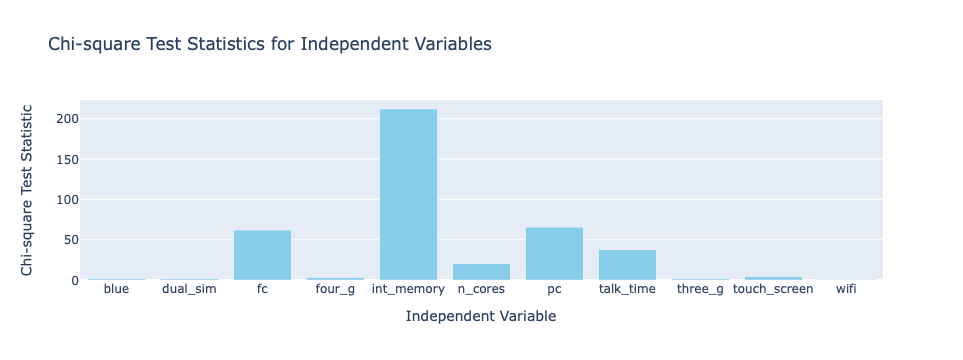

For 'blue': Fail to reject null hypothesis. There is no evidence of a relationship.
For 'dual_sim': Fail to reject null hypothesis. There is no evidence of a relationship.
For 'fc': Fail to reject null hypothesis. There is no evidence of a relationship.
For 'four_g': Fail to reject null hypothesis. There is no evidence of a relationship.
For 'int_memory': Fail to reject null hypothesis. There is no evidence of a relationship.
For 'n_cores': Fail to reject null hypothesis. There is no evidence of a relationship.
For 'pc': Fail to reject null hypothesis. There is no evidence of a relationship.
For 'talk_time': Fail to reject null hypothesis. There is no evidence of a relationship.
For 'three_g': Fail to reject null hypothesis. There is no evidence of a relationship.
For 'touch_screen': Fail to reject null hypothesis. There is no evidence of a relationship.
For 'wifi': Fail to reject null hypothesis. There is no evidence of a relationship.


In [84]:
import pandas as pd
from scipy.stats import chi2_contingency, chi2
import plotly.graph_objects as go


# Drop the dependent variable from the DataFrame to avoid analyzing it against itself
independent_variables = df_category.drop(columns=['price_range'])

# Calculate chi-square test statistics and p-values
column_names = []
chi2_values = []
p_values = []
critical_values = {}

# Set significance level (alpha)
alpha = 0.05

for independent_var in independent_variables.columns:
    # Create a contingency table (cross-tabulation)
    contingency_table = pd.crosstab(df[independent_var], df['price_range'])
    
    # Perform chi-square test
    chi2_stat, p, _, _ = chi2_contingency(contingency_table)
    
    # Calculate degrees of freedom (df)
    r, c = contingency_table.shape
    df_degrees_freedom = (r - 1) * (c - 1)

    # Find critical value from chi-square distribution
    critical_value = chi2.ppf(1 - alpha, df_degrees_freedom)

    # Store critical value for the column
    critical_values[independent_var] = critical_value

    column_names.append(independent_var)
    chi2_values.append(chi2_stat)
    p_values.append(p)

data = {'Independent Variable': column_names, 'Chi-square Test Statistic': chi2_values, 'P-value': p_values}
df_table = pd.DataFrame(data)


# Convert the dictionary to a DataFrame
critical_values_df = pd.DataFrame.from_dict(critical_values, orient='index', columns=['Critical Value'])


# Merge the critical values DataFrame with the df_table DataFrame
result_df = pd.merge(df_table, critical_values_df, left_on='Independent Variable', right_index=True)

# Print the result DataFrame
print("Chi-square test statistics with Critical Values and P-values:")
print(result_df)

# Create bar chart trace
bar_trace = go.Bar(x=result_df['Independent Variable'], y=result_df['Chi-square Test Statistic'], marker_color='skyblue')

# Create layout
layout = go.Layout(title='Chi-square Test Statistics for Independent Variables',
                   xaxis=dict(title='Independent Variable'),
                   yaxis=dict(title='Chi-square Test Statistic'))

# Create figure
fig = go.Figure(data=[bar_trace], layout=layout)

# Show the plot
fig.show()


# Check for significance of chi-square test 
for index, row in result_df.iterrows():
    if row['P-value'] < alpha:
        print(f"For '{row['Independent Variable']}': Reject null hypothesis. There is evidence of a relationship.")
    else:
        print(f"For '{row['Independent Variable']}': Fail to reject null hypothesis. There is no evidence of a relationship.")


In [ ]:
#there is no relation

In [85]:
df_continuous

,battery_power,clock_speed,m_dep,mobile_wt,px_height,px_width,ram,sc_h,sc_w
0,842,2.2,0.6,188,20,756,2549,9,7
1,1021,0.5,0.7,136,905,1988,2631,17,3
2,563,0.5,0.9,145,1263,1716,2603,11,2
3,615,2.5,0.8,131,1216,1786,2769,16,8
4,1821,1.2,0.6,141,1208,1212,1411,8,2
...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0.8,106,1222,1890,668,13,4
1996,1965,2.6,0.2,187,915,1965,2032,11,10
1997,1911,0.9,0.7,108,868,1632,3057,9,1
1998,1512,0.9,0.1,145,336,670,869,18,10


In [86]:
df_continuous.columns

Index(['battery_power', 'clock_speed', 'm_dep', 'mobile_wt', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w'],
      dtype='object')

In [105]:
# Annova Test

In [93]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming 'category' is your categorical variable and other columns are continuous
categorical_variable = 'price_range'
continuous_columns = ['fc', 'n_cores', 'pc', 'int_memory', 'battery_power', 'clock_speed', 'm_dep', 'mobile_wt', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w']

# Create lists to store ANOVA results
columns = []
f_values = []
p_values = []
significances = []

# Perform ANOVA for each continuous column
for col in continuous_columns:
    # Fit ANOVA model
    model = ols(f"{col} ~ {categorical_variable}", data=df).fit()
    
    # Get ANOVA table
    anova_table = sm.stats.anova_lm(model, typ=2)
    
    # Extract p-value
    p_value = anova_table['PR(>F)'][categorical_variable]    # PR = probability or p_value
    
    # Set significance level (alpha)
    alpha = 0.05
    
    # Determine significance
    significance = 'Significant' if p_value < alpha else 'Not Significant'
    
    # Append ANOVA results to lists
    columns.append(col)
    f_values.append(anova_table['F'][categorical_variable])
    p_values.append(p_value)
    significances.append(significance)

# Create DataFrame for ANOVA results
anova_results = pd.DataFrame({
    'Column': columns,
    'F-value': f_values,
    'PR(>F)': p_values,
    'Significance': significances
})

# Print ANOVA results DataFrame
print("ANOVA results:")
print(anova_results)


ANOVA results:
           Column       F-value        PR(>F)     Significance
0              fc      0.967343  3.254629e-01  Not Significant
1         n_cores      0.038669  8.441253e-01  Not Significant
2              pc      2.258117  1.330736e-01  Not Significant
3      int_memory      3.952787  4.693006e-02      Significant
4   battery_power     83.877962  1.264854e-19      Significant
5     clock_speed      0.087187  7.678151e-01  Not Significant
6           m_dep      0.001454  9.695879e-01  Not Significant
7       mobile_wt      1.836293  1.755393e-01  Not Significant
8       px_height     45.276079  2.227806e-11      Significant
9        px_width     56.489089  8.478969e-14      Significant
10            ram  10565.894952  0.000000e+00      Significant
11           sc_h      1.056220  3.042032e-01  Not Significant
12           sc_w      2.998622  8.348974e-02  Not Significant


In [ ]:
#  battery_power, px_height, px_width, ram having (relationship)significant difference in means between groups or categories.
eventough fc, n_cores, pc, int_memory is seperated as categorical it is discrete variable so it is also checked as continuous variable.
where int_memory having Siginficant difference

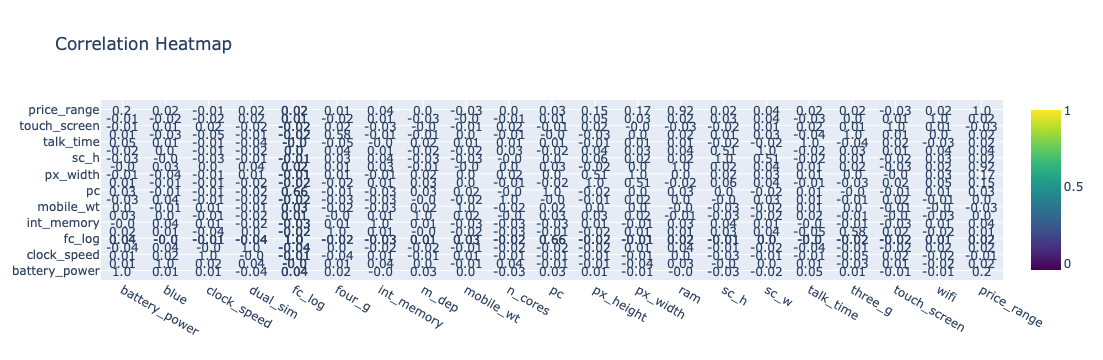

In [217]:
import plotly.graph_objs as go

# Calculate the correlation matrix
corr = df.corr()

# Create a heatmap trace
heatmap = go.Heatmap(z=corr.values,
                     x=corr.columns,
                     y=corr.columns,
                     colorscale='Viridis',
                     hoverongaps=False)

# Add text annotations
annotations = []
for i, row in enumerate(corr.index):         #using enumerate method         #use any one method
    for j in range(len(corr.columns)):       #using normal method 
        annotations.append(dict(text=str(round(corr.iloc[i, j], 2)),
                                x=corr.columns[j],     #for normal method
                                y=row,                 #for enumerate method
                                xref='x1',
                                yref='y1',
                                showarrow=False))

# Create layout
layout = go.Layout(title='Correlation Heatmap',
                   annotations=annotations)

# Create figure
fig = go.Figure(data=[heatmap], layout=layout)

# Show the plot
fig.show()


In [ ]:
#primary camera and front camera has higher correlation
# pixel height and pixel width has moderate correlation
#screen height and screen width has moderate correlation

pixel height and pixel width are directly propotional so i can keep any one of them to reduce redundancy
so im eliminating pixel height due to its lower f-value compare to pixel width

screen height and screen width are directly propotional so i can keep any one of them to reduce redundancy
so im eliminating screen height due to its lower f-value compare to width width

technically primary camera and front are unique features so i cant eliminate one of them

In [ ]:
# logarthmic transformation for fc

In [246]:
epsilon = 1  # Small constant

# Create a new column with the logarithmic transformation, handling zero and negative values
df1['fc_log'] = np.log(df['fc'] + epsilon)

In [240]:
df1['fc_log']

0       0.693147
1       0.000000
2       1.098612
3       0.000000
4       2.639057
          ...   
1995    0.000000
1996    0.000000
1997    0.693147
1998    1.609438
1999    1.791759
Name: fc_log, Length: 2000, dtype: float64

In [248]:
df['fc'] = df1['fc_log']

In [249]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,0.693147,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0.000000,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,1.098612,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0.000000,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,2.639057,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0.000000,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0.000000,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,0.693147,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,1.609438,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [170]:
df.rename(columns={'fc': 'fc_log'}, inplace=True)

In [245]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [197]:
test=pd.read_csv('/Users/ptsaravanan/Documents/DATA SCIENCE/Project/Mentorness Project/Mobile Price Classification/test.csv')

In [279]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

# Assume your target variable is 'price_range'
X = df.drop(['px_height', 'sc_w', 'three_g', 'price_range'], axis=1)  # Features
y = df['price_range']  # Target (class labels)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Random Forest classifier with 500 trees
rf_classifier = RandomForestClassifier(n_estimators=500, random_state=42)

# Train the Random Forest model on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the training set to evaluate training accuracy
y_train_pred = rf_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Compute F1-score for the training set
train_f1 = f1_score(y_train, y_train_pred, average="weighted")

# Predict on the test set to evaluate test accuracy
y_test_pred = rf_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Compute F1-score for the test set
test_f1 = f1_score(y_test, y_test_pred, average="weighted")

# Additional metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)  # Confusion matrix
class_report = classification_report(y_test, y_test_pred)  # Precision, recall, F1-score

# Output results
print("Train Accuracy:", train_accuracy)  # Train accuracy of the model
print("Train F1-Score (Weighted):", train_f1)  # Train F1-score with weighted average
print("Test Accuracy:", test_accuracy)  # Test accuracy of the model
print("Test F1-Score (Weighted):", test_f1)  # Test F1-score with weighted average
print("Confusion Matrix:\n", conf_matrix)  # Display confusion matrix
print("Classification Report:\n", class_report)  # Detailed report of metrics


Train Accuracy: 1.0
Train F1-Score (Weighted): 1.0
Test Accuracy: 0.8725
Test F1-Score (Weighted): 0.8731270211523707
Confusion Matrix:
 [[101   4   0   0]
 [  6  77   8   0]
 [  0   8  75   9]
 [  0   0  16  96]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.87      0.85      0.86        91
           2       0.76      0.82      0.79        92
           3       0.91      0.86      0.88       112

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



In [278]:
from sklearn.linear_model import LogisticRegression

# Assume your target variable is 'price_range'
X = df.drop(['px_height', 'sc_w', 'three_g', 'price_range'], axis=1)  # Features
y = df['price_range']  # Target (class labels)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression with default parameters
log_reg = LogisticRegression(random_state=42, max_iter=1000)  # Increase max_iter for convergence

# Train the Logistic Regression model on the training data
log_reg.fit(X_train, y_train)

# Get predictions on the training set
y_train_pred = log_reg.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Compute the F1-score for the training set
train_f1 = f1_score(y_train, y_train_pred, average="weighted")

# Predict on the test set to get test accuracy
y_test_pred = log_reg.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Compute the F1-score for the test set
test_f1 = f1_score(y_test, y_test_pred, average="weighted")

# Additional metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)  # Confusion matrix
class_report = classification_report(y_test, y_test_pred)  # Precision, recall, F1-score

# Output results
print("Train Accuracy:", train_accuracy)  # Train accuracy of the model
print("Train F1-Score (Weighted):", train_f1)  # Train F1-score with weighted average
print("Test Accuracy:", test_accuracy)  # Test accuracy of the model
print("Test F1-Score (Weighted):", test_f1)  # Test F1-score with weighted average
print("Confusion Matrix:\n", conf_matrix)  # Display confusion matrix
print("Classification Report:\n", class_report)  # Detailed report of metrics


Train Accuracy: 0.69625
Train F1-Score (Weighted): 0.6964184537860482
Test Accuracy: 0.6975
Test F1-Score (Weighted): 0.6992203516207838
Confusion Matrix:
 [[86 19  0  0]
 [11 59 17  4]
 [ 0 20 48 24]
 [ 0  1 25 86]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.82      0.85       105
           1       0.60      0.65      0.62        91
           2       0.53      0.52      0.53        92
           3       0.75      0.77      0.76       112

    accuracy                           0.70       400
   macro avg       0.69      0.69      0.69       400
weighted avg       0.70      0.70      0.70       400



/Users/ptsaravanan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [277]:
from sklearn.tree import DecisionTreeClassifier

# Assuming your target variable is 'price_range'
X = df.drop(['px_height', 'sc_w', 'three_g', 'price_range'], axis=1)  # Features
y = df['price_range']  # Target (class labels)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree classifier with default parameters
tree_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model on the training data
tree_classifier.fit(X_train, y_train)

# Get predictions on the training set
y_train_pred = tree_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Compute the F1-score for the training set
train_f1 = f1_score(y_train, y_train_pred, average="weighted")

# Predict on the test set to get test accuracy
y_test_pred = tree_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Compute the F1-score for the test set
test_f1 = f1_score(y_test, y_test_pred, average="weighted")

# Additional metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)  # Confusion matrix
class_report = classification_report(y_test, y_test_pred)  # Precision, recall, F1-score

# Output results
print("Train Accuracy:", train_accuracy)
print("Train F1-Score (Weighted):", train_f1)
print("Test Accuracy:", test_accuracy)
print("Test F1-Score (Weighted):", test_f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)  # Detailed report of metrics


Train Accuracy: 1.0
Train F1-Score (Weighted): 1.0
Test Accuracy: 0.82
Test F1-Score (Weighted): 0.8214177410604685
Confusion Matrix:
 [[96  9  0  0]
 [ 6 71 14  0]
 [ 0 15 65 12]
 [ 0  0 16 96]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93       105
           1       0.75      0.78      0.76        91
           2       0.68      0.71      0.70        92
           3       0.89      0.86      0.87       112

    accuracy                           0.82       400
   macro avg       0.82      0.81      0.81       400
weighted avg       0.82      0.82      0.82       400



In [276]:

from catboost import CatBoostClassifier

# Assuming df is your DataFrame and 'price_range' is the target variable
X = df.drop(['px_height', 'sc_w', 'three_g', 'price_range'], axis=1)  # Features
y = df['price_range']  # Target variable

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize CatBoost classifier with specified parameters
catboost_classifier = CatBoostClassifier(
    iterations=500,  # Number of boosting iterations
    learning_rate=0.1,  # Learning rate for CatBoost
    depth=6,  # Maximum depth of trees
    random_seed=42,  # For reproducibility
    verbose=100  # Display progress every 100 iterations
)

# Train the CatBoost model on the training data
catboost_classifier.fit(X_train, y_train)

# Get predictions for the training set
y_train_pred = catboost_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Compute the F1-score for the training set
train_f1 = f1_score(y_train, y_train_pred, average="weighted")

# Predict on the test set
y_test_pred = catboost_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Compute the F1-score for the test set
test_f1 = f1_score(y_test, y_test_pred, average="weighted")

# Evaluate model performance with additional metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

# Output results
print("Train Accuracy:", train_accuracy)
print("Train F1-Score (Weighted):", train_f1)
print("Test Accuracy:", test_accuracy)
print("Test F1-Score (Weighted):", test_f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


0:	learn: 1.2550150	total: 5.48ms	remaining: 2.73s
100:	learn: 0.2040817	total: 129ms	remaining: 508ms
200:	learn: 0.1255924	total: 247ms	remaining: 367ms
300:	learn: 0.0865248	total: 361ms	remaining: 238ms
400:	learn: 0.0628945	total: 481ms	remaining: 119ms
499:	learn: 0.0485211	total: 597ms	remaining: 0us
Train Accuracy: 1.0
Train F1-Score (Weighted): 1.0
Test Accuracy: 0.8875
Test F1-Score (Weighted): 0.8884867818092259
Confusion Matrix:
 [[100   5   0   0]
 [  3  82   6   0]
 [  0   8  77   7]
 [  0   0  16  96]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       105
           1       0.86      0.90      0.88        91
           2       0.78      0.84      0.81        92
           3       0.93      0.86      0.89       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



In [275]:
import xgboost as xgb

# Assuming 'df' is your DataFrame and 'price_range' is your target variable
X = df.drop(['px_height', 'sc_w', 'three_g', 'price_range'], axis=1)  # Features
y = df['price_range']  # Target variable

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(
    n_estimators=100,  # Number of boosting rounds
    max_depth=6,  # Maximum depth of trees
    learning_rate=0.1,  # Learning rate
    random_state=42  # For reproducibility
)

# Train the XGBoost model on the training data
xgb_classifier.fit(X_train, y_train)

# Get predictions for the training set
y_train_pred = xgb_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Compute F1-score for the training set
train_f1_score = f1_score(y_train, y_train_pred, average="weighted")

# Predict on the test set to get test accuracy and F1-score
y_test_pred = xgb_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Compute F1-score for the test set
test_f1_score = f1_score(y_test, y_test_pred, average="weighted")

# Additional evaluation metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

# Output results
print("Train Accuracy:", train_accuracy)  # Accuracy on training data
print("Train F1-Score (Weighted):", train_f1_score)
print("Test Accuracy:", test_accuracy)  # Accuracy on test data
print("Test F1-Score (Weighted):", test_f1_score)
print("Confusion Matrix:\n", conf_matrix)  # Display confusion matrix
print("Classification Report:\n", class_report)  # Detailed report of metrics


Train Accuracy: 1.0
Train F1-Score (Weighted): 1.0
Test Accuracy: 0.8875
Test F1-Score (Weighted): 0.8874798979133689
Confusion Matrix:
 [[99  6  0  0]
 [ 4 85  2  0]
 [ 0  8 74 10]
 [ 0  0 15 97]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       105
           1       0.86      0.93      0.89        91
           2       0.81      0.80      0.81        92
           3       0.91      0.87      0.89       112

    accuracy                           0.89       400
   macro avg       0.88      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



In [274]:
from sklearn.ensemble import GradientBoostingClassifier


# Assuming 'df' is your DataFrame and 'price_range' is your target variable
X = df.drop(['px_height', 'sc_w', 'three_g', 'price_range'], axis=1)  # Features
y = df['price_range']  # Target variable

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
)

# Train the Gradient Boosting model on the training data
gb_classifier.fit(X_train, y_train)

# Get predictions for the training set
y_train_pred = gb_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Compute F1-score for the training set
train_f1_score = f1_score(y_train, y_train_pred, average="weighted")

# Predict on the test set to get test accuracy and F1-score
y_test_pred = gb_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Compute F1-score for the test set
test_f1_score = f1_score(y_test, y_test_pred, average="weighted")

# Additional evaluation metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)  # Confusion matrix
class_report = classification_report(y_test, y_test_pred)

# Output results
print("Train Accuracy:", train_accuracy)
print("Train F1-Score (Weighted):", train_f1_score)
print("Test Accuracy:", test_accuracy)
print("Test F1-Score (Weighted):", test_f1_score)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Train Accuracy: 0.990625
Train F1-Score (Weighted): 0.9906255098079542
Test Accuracy: 0.88
Test F1-Score (Weighted): 0.8810347812039092
Confusion Matrix:
 [[99  6  0  0]
 [ 3 81  7  0]
 [ 0  9 75  8]
 [ 0  0 15 97]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96       105
           1       0.84      0.89      0.87        91
           2       0.77      0.82      0.79        92
           3       0.92      0.87      0.89       112

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



In [273]:
from sklearn.svm import SVC

# Prepare data
X = df.drop(['px_height', 'sc_w', 'three_g', 'price_range'], axis=1)  # Features
y = df['price_range']  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the SVC model
svc = SVC(kernel='linear', C=1.0, random_state=42)
svc.fit(X_train, y_train)

# Predictions for training and test sets
y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Calculate F1-scores for training and test sets
train_f1 = f1_score(y_train, y_train_pred, average="weighted")
test_f1 = f1_score(y_test, y_test_pred, average="weighted")

# Get confusion matrix and classification report for test set
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

# Output results
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Train F1-Score (Weighted):", train_f1)
print("Test F1-Score (Weighted):", test_f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Train Accuracy: 0.916875
Test Accuracy: 0.905
Train F1-Score (Weighted): 0.9169917241302623
Test F1-Score (Weighted): 0.905586632885722
Confusion Matrix:
 [[100   5   0   0]
 [  4  82   5   0]
 [  0   4  81   7]
 [  0   0  13  99]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       105
           1       0.90      0.90      0.90        91
           2       0.82      0.88      0.85        92
           3       0.93      0.88      0.91       112

    accuracy                           0.91       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.91      0.91      0.91       400



In [272]:
from sklearn.neighbors import KNeighborsClassifier

# Assuming 'df' is your DataFrame and 'price_range' is your target variable
X = df.drop(['px_height', 'sc_w', 'three_g', 'price_range'], axis=1)  # Features
y = df['price_range']  # Target variable

# Standardize the features for KNN (important due to distance-based calculations)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize a KNN classifier with k=5
knn_classifier = KNeighborsClassifier(
    n_neighbors=5,  # Number of neighbors to consider
    weights='uniform',  # 'uniform' for equal weighting, 'distance' for distance-based weighting
    metric='euclidean'  # Distance metric ('euclidean', 'manhattan', etc.)
)

# Train the KNN model on the training data
knn_classifier.fit(X_train, y_train)

# Get predictions for the training set
y_train_pred = knn_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Predict on the test set to get test accuracy
y_test_pred = knn_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Additional evaluation metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)  # Confusion matrix
class_report = classification_report(y_test, y_test_pred)  # Detailed report with precision, recall, F1-score

# Output results
print("Train Accuracy:", train_accuracy)  # Accuracy on training data
print("Train F1-Score:", train_f1)  # F1-score on training data
print("Test Accuracy:", test_accuracy)  # Accuracy on test data
print("Test F1-Score:", test_f1)  # F1-score on test data
print("Confusion Matrix:\n", conf_matrix)  # Display confusion matrix
print("Classification Report:\n", class_report)  # Detailed report with metrics


Train Accuracy: 0.7275
Train F1-Score: 0.7281915461154551
Test Accuracy: 0.5025
Test F1-Score: 0.5148487099741648
Confusion Matrix:
 [[75 26  4  0]
 [26 32 30  3]
 [ 8 37 35 12]
 [ 0 11 42 59]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.71      0.70       105
           1       0.30      0.35      0.32        91
           2       0.32      0.38      0.34        92
           3       0.80      0.53      0.63       112

    accuracy                           0.50       400
   macro avg       0.53      0.49      0.50       400
weighted avg       0.55      0.50      0.51       400



In [271]:
from sklearn.naive_bayes import GaussianNB


# Feature selection and target variable
X = df.drop(['px_height', 'sc_w', 'three_g', 'price_range'], axis=1)  # Features
y = df['price_range']  # Target variable

# Standardize the features (optional for Gaussian Naive Bayes but recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Get predictions for the training set
y_train_pred = nb_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Predict on the test set to get test accuracy
y_test_pred = nb_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

# Output results
print("Train Accuracy:", train_accuracy)  # Accuracy on training data
print("Train F1-Score:", train_f1)  # F1-score on training data
print("Test Accuracy:", test_accuracy)  # Accuracy on test data
print("Test F1-Score:", test_f1)  # F1-score on test data
print("Confusion Matrix:\n", conf_matrix)  # Display confusion matrix
print("Classification Report:\n", class_report)  # Detailed report of metrics


Train Accuracy: 0.796875
Train F1-Score: 0.7966096884987729
Test Accuracy: 0.785
Test F1-Score: 0.7861458165809274
Confusion Matrix:
 [[94 11  0  0]
 [13 59 19  0]
 [ 0  8 71 13]
 [ 0  0 22 90]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       105
           1       0.76      0.65      0.70        91
           2       0.63      0.77      0.70        92
           3       0.87      0.80      0.84       112

    accuracy                           0.79       400
   macro avg       0.79      0.78      0.78       400
weighted avg       0.79      0.79      0.79       400



In [282]:
# svc shows higher accuracy of 90% so i'm predicting my test data by svc algorithm

In [ ]:
predict_data=pd.read_csv('test_data.csv')
predict_data

In [ ]:
from sklearn.svm import SVC

# Prepare data
X = df.drop(['px_height', 'sc_w', 'three_g', 'price_range'], axis=1)  # Features
y = df['price_range']  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the SVC model
svc = SVC(kernel='linear', C=1.0, random_state=42)
svc.fit(X_train, y_train)

# Predictions for training and test sets
y_pred = svc.predict(X_test)
# Evaluate model using cross-validation
# Assuming you want to use 5-fold cross-validation
cv_scores = cross_val_score(rf_classifier, x_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())


In [ ]:
# Print the predicted values
print("Predicted Values:")
print(y_pred)

In [ ]:
# Assuming you have already made predictions and stored them in y_pred

# Convert the predicted values to a DataFrame
predictions_df = pd.DataFrame(y_pred, columns=['predicted_price_range'])

# Concatenate the predictions DataFrame with the test data DataFrame
test_data_with_predictions = pd.concat([x_test, predictions_df], axis=1)

# Display the test data with predicted values
print("Test Data with Predictions:")
test_data_with_predictions

In [ ]:
#transfer to local_system
test_data_with_predictions.to_csv('ur_location.csv', index=False)